# Light-weight Document Image Cleanup using Perceptual Loss
## Abstract
Smartphones have enabled effortless capturing and sharing of documents in digital form. The documents, however, often undergo various types of degradation due to aging, stains, or shortcoming of capturing environment such as shadow, non-uniform lighting, etc., which reduces the comprehensibility of the document images. In this work, we consider the problem of document image cleanup on embedded applications such as smartphone apps, which usually have memory, energy, and latency limitations due to the device and/or for best human user experience. We propose a light-weight encoder decoder based convolutional neural network architecture for removing the noisy elements from document images. 
To compensate for generalization performance with a low network capacity, we incorporate the perceptual loss for knowledge transfer from pre-trained deep CNN network in our loss function. In terms of the number of parameters and product-sum operations, our models are 65-1030 and 3-27 times, respectively, smaller than existing state-of-the-art document enhancement models. Overall, the proposed models offer a favorable resource versus accuracy trade-off and we empirically illustrate the efficacy of our approach on several real-world benchmark datasets.


### Cite
https://link.springer.com/chapter/10.1007/978-3-030-86334-0_16

@InProceedings{10.1007/978-3-030-86334-0_16,
author="Dey, Soumyadeep
and Jawanpuria, Pratik",
editor="Llad{\'o}s, Josep
and Lopresti, Daniel
and Uchida, Seiichi",
title="Light-Weight Document Image Cleanup Using Perceptual Loss",
booktitle="Document Analysis and Recognition -- ICDAR 2021",
year="2021",
publisher="Springer International Publishing",
address="Cham",
pages="238--253",
isbn="978-3-030-86334-0"
}

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import os
import sys
import ssl
from matplotlib import pyplot as plt
ssl._create_default_https_context = ssl._create_unverified_context

# Train

In [2]:
from train import train

In [3]:
data_folder = 'sample_data'
gt_folder = 'sample_gt_data'

In [5]:
#train(data_folder,gt_folder,dataset_path='dataset',checkpoint='checkpoints',epochs=10,pretrain_flag=False,pretrain_model_weight_path=None,model_name='M32',gray_flag=True,block_size=(256,256),train_batch_size=1)
#model_name = name of the model (M16,M32,M64)
#dataset_path==> path to the training dataset
#checkpoint==> Path where saved models will be saved
#pretrain_flag=True if you are initializing your model with some pre-trained weight
#pretrain_model_weight_path==> path to the pretrained model weight (if pre-trained model flag is set to True)
#gray_flag=True if you want final layer of the model to have only 1 channel
#in case of color output, we need to set gray_flag=False (by default it is set as True)
#block_size==> patch size per image/model input size, (by default=(256 X 256))
#train_batch_size==> bath size during training

model_name = 'M16'
train(data_folder,gt_folder,dataset_path='dataset',checkpoint='checkpoints',epochs=1,gray_flag=True,model_name=model_name,pretrain_flag=True,pretrain_model_weight_path='checkpoints/M16_dibco13_epoch-958.hdf5')


  0%|          | 0/2 [00:00<?, ?it/s]

256 256
sample_data
sample_gt_data
sample_data
Generating training blocks!!!
dataset/sample_data
dataset/sample_data
['image_56.png', 'image_42.png']
image_56.png
dataset/sample_gt_data/image_56.png
dataset/sample_data/image_56.png
(1613, 1493, 3) (1613, 1493, 3)


 50%|█████     | 1/2 [00:01<00:01,  1.96s/it]

image_42.png
dataset/sample_gt_data/image_42.png
dataset/sample_data/image_42.png
(1308, 2379, 3) (1308, 2379, 3)


100%|██████████| 2/2 [00:04<00:00,  2.46s/it]


Total number of training blocks generated:  496
tf.Tensor(394516500.0, shape=(), dtype=float32)
checkpoints/M16_gray.json
396/396 [==============================] - ETA: 0s - loss: 208049664.0000
Epoch 00001: val_loss improved from inf to 112988376.00000, saving model to checkpoints/M16_gray_sample_data_epoch-01.hdf5
396/396 [==============================] - 1369s 3s/step - loss: 208049664.0000 - val_loss: 112988376.0000


# Inference per image

In [6]:
from infer import infer_image

In [10]:

##########################################################################################
#Input image
test_img_name = 'dataset/sample_data/image_56.png'
##########################################################################################
#calling inference engine
out_img_name = 'test_out1.jpeg'
infer_image('checkpoints/M16_gray.json','checkpoints/M16_gray_sample_data_epoch-01.hdf5',test_img_name,out_img_name)


Model: "M16Gray"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 256, 256, 16) 448         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_13 (BatchNo (None, 256, 256, 16) 64          conv2d_13[0][0]                  
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 256, 256, 16) 2320        batch_normalization_13[0][0]     
____________________________________________________________________________________________

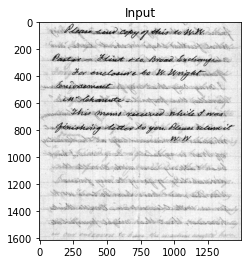

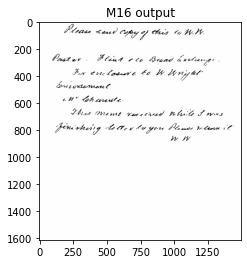

In [11]:
##########################################################################################
#Dispaly input output image

in_img = cv2.imread(test_img_name,1)
plt.imshow(in_img,cmap = 'gray')
plt.title('Input')
plt.show()

out_img = cv2.imread(out_img_name,1)
plt.imshow(out_img,cmap = 'gray')
plt.title('M16 output')
plt.show()

# inference per folder

In [8]:
from infer import infer

In [9]:
input_dir = 'dataset/sample_data'
out_dir = 'sample_out_data'
infer('checkpoints/M16_gray.json','checkpoints/M16_gray_sample_data_epoch-01.hdf5',input_dir,out_dir)

  0%|          | 0/2 [00:00<?, ?it/s]

Model: "M16Gray"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 256, 256, 16) 448         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_13 (BatchNo (None, 256, 256, 16) 64          conv2d_13[0][0]                  
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 256, 256, 16) 2320        batch_normalization_13[0][0]     
____________________________________________________________________________________________

100%|██████████| 2/2 [00:31<00:00, 15.73s/it]
